<a href="https://colab.research.google.com/github/sourabh111dotcom/EDA-CApstone/blob/main/Sourabh_Choudhary_Retail_Sales_Prediction_Capstone_Project_2_ML_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Sales Prediction : Predicting sales of a major store chain Rossmann





##### **Project Type**    - Regression
##### **Contribution**    - Individual - Sourabh Choudhary



# **Project Summary -**

We have been given historical data of Rossman stores which included several factors which affects the sales of the stores which includes several factors like Promotion, State holiday, School holiday and etc.The process followed:

1. Analysed the data- The number of rows and columns it had,type of the features presented,the kind of data each particular feature had,checked for duplicated or missing values.
2. Data manipulation- Checked for outliers and null values and fiixed it with the necessary operations.
3. Data Visualiztion - plotted various graphs and like customers,state holiday,school holiday,types of stores etc. charts to find out their affect on sales.Also plotted heatmap to find the correlation between different features.
4. Perfomed various hypothesis testing to get the select the correct hypothesis based on different types of test.
5. Data Pre-processing and feature selection- Treated categorical values and performed encoding. Dropped the unnecessary columns and rows.
6. Model Implementation - 2 model have been created:Model 1 with the pre-processed data that have selected features and rows and Model 2 having all the data.
7. ML algorithms that were performed were - Linear Regression,Decision Tree, Decision Tree with Hyperparameter tuning and Random forest.
8. In both the models Random Forest performed the best whereas while comparing both models it was found out that Model 2 was performing better than Model 1.
9. It can be seen that while droping rows and columns in Model 1 it lost some information which reduces the model's accuracy.
10. So,Model 2 was better suited for prediction of the provided dataset of Rossman Store.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
rossmann_df = pd.read_csv("/content/drive/MyDrive/Reggresion project/Rossmann Stores Data (1).csv")
store_df = pd.read_csv("/content/drive/MyDrive/Reggresion project/store (2).csv")


<ipython-input-3-c1ccc3dc9c41>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv("/content/drive/MyDrive/Reggresion project/Rossmann Stores Data (1).csv")


### Dataset First View

In [4]:
# Dataset First Look
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
rossmann_df.shape

(1017209, 9)

As we can here that the Rossmann Dataset consist of 1017209 Values and 9 features.

In [7]:
store_df.shape

(1115, 10)

### Dataset Information

In [8]:
# Dataset Info
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(rossmann_df[rossmann_df.duplicated()])

0

In [12]:
len(store_df[store_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Lokking for NAN Values from Store data

In [13]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

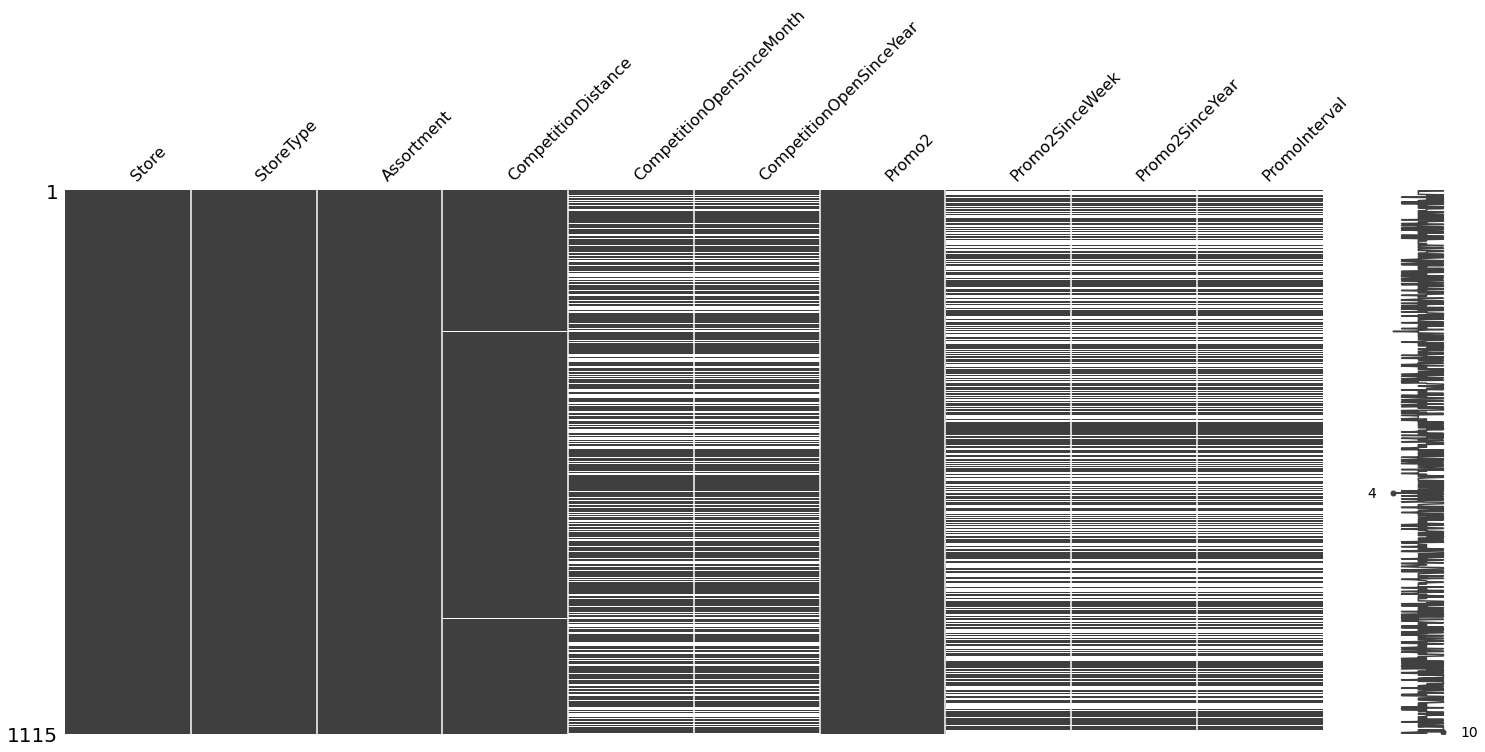

In [16]:
#visualizing the missing values
import missingno as msno
msno.matrix(store_df)

<Axes: >

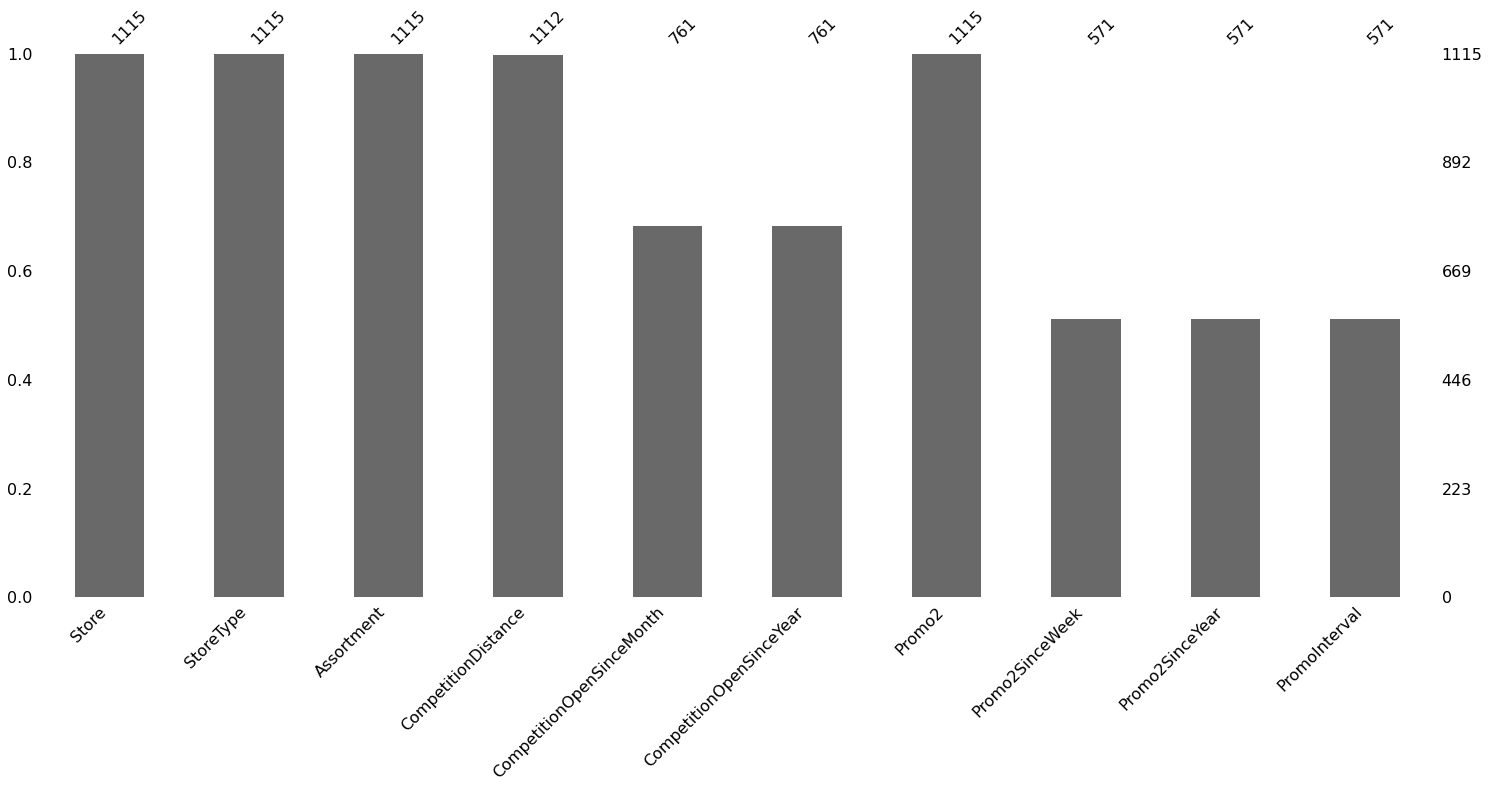

In [17]:
msno.bar(store_df)

1. CompetitionDistance has 3 null values.
2. CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 null values.
3. Promo2SinceWeek ,Promo2SinceYear and PromoInterval have 544 null values.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
list(store_df.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [20]:
# Dataset Describe
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [21]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Most of the fields are self-explanatory. The following are descriptions for those that aren't.
Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

 **Check Unique Values For Each Variable.**

In [22]:
# check unique values for each variable.
for col in list(store_df.columns):
  print(col)
  print('Unique Values:')
  print(store_df[col].unique())
  print('lenght:',len(store_df[col].unique()))
  print("-"*50)

Store
Unique Values:
[   1    2    3 ... 1113 1114 1115]
lenght: 1115
--------------------------------------------------
StoreType
Unique Values:
['c' 'a' 'd' 'b']
lenght: 4
--------------------------------------------------
Assortment
Unique Values:
['a' 'c' 'b']
lenght: 3
--------------------------------------------------
CompetitionDistance
Unique Values:
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02


## 3. ***Data Wrangling***

<Axes: >

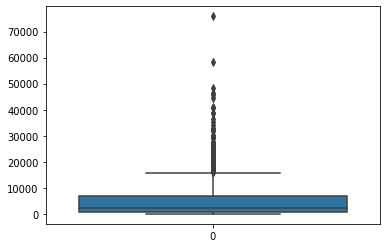

In [23]:
# Write your code to make your dataset analysis ready.
sns.boxplot(store_df['CompetitionDistance'])

In [25]:
store_df1=store_df.copy()
store_df1['CompetitionDistance']=store_df1['CompetitionDistance'].fillna(0) #Filling the 3 null values with 0
store_df1['CompetitionDistance'].isnull().sum()
#CompetitionDistance contains many outlier which needs to be fixed

0

0

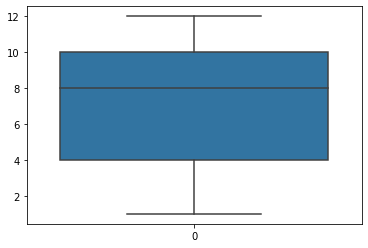

In [29]:
sns.boxplot(store_df1['CompetitionOpenSinceMonth'])
#No outlier is present in CompetitionOpenSinceMonth,So only the null values has to be taken care
store_df1['CompetitionOpenSinceMonth']=store_df1['CompetitionOpenSinceMonth'].fillna(0)
store_df1['CompetitionOpenSinceMonth'].isnull().sum()

In [30]:
store_df1.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

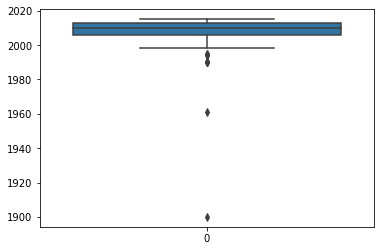

In [31]:
sns.boxplot(store_df1['CompetitionOpenSinceYear'])

In [32]:
store_df1['CompetitionOpenSinceYear']=store_df1['CompetitionOpenSinceYear'].fillna(0)
store_df1['CompetitionOpenSinceYear'].isnull().sum()

0

In [33]:
store_df1['Promo2SinceWeek']=store_df1['Promo2SinceWeek'].fillna(0)
store_df1['Promo2SinceYear']=store_df1['Promo2SinceYear'].fillna(0)
store_df1['PromoInterval']=store_df1['PromoInterval'].fillna(0)

In [34]:
import datetime as dt
df1=rossmann_df.copy()
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month

In [36]:
store_df1.isnull().sum()
#The data has been cleaned

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [39]:
#Merging of rossman stores data and store
dff = pd.merge(df1, store_df1, how='left', on='Store')

In [40]:
dff.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
year                         0
month                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [41]:
dff.shape

(1017209, 20)

### What all manipulations have you done and insights you found?

1. CompetitionDistance has 3 null value which was replaced by 0 and it was found out that it has many outliers.
2. CompetitionOpenSinceMonth has no outliers.
3. CompetitionOpenSinceYear has 4 outliers. 1900, 1960 and 2 outliers between 1980 and 2000.
4. Promo2SinceWeek, Promo2SinceYear and PromoInterval had null values that was replaced by 0.
5. Rossman Store data and Store data have been merged. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Store Operating Each day Of the Week

<Axes: xlabel='DayOfWeek', ylabel='count'>

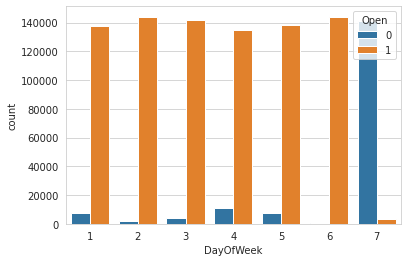

In [42]:
# Chart - 1 visualization code 
sns.set_style("whitegrid")
sns.countplot(x='DayOfWeek',hue='Open',data=dff)

##### 1. Why did you pick the specific chart?

To check the number of stores opened on each specific day of the week.

##### 2. What is/are the insight(s) found from the chart?

as we can see from the graph that most of the store are open 6 days but on the 7th day i.e Sunday most of the store are closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will provide us the number of the stores operating everyday.Suppose a company wants to find out on which day the maximum number of stores are opened and how mush they are contributing to the overall sales this graph wil be helpful and it also shows how mush it is getting affected due to closed stores.

#### Chart - 2- Sales of each year and its respective month

In [44]:
# Chart - 2 visualization code
x=dff.groupby(['year','month'],as_index=False).agg({'Sales':"sum"})
x.year.unique()

array([2013, 2014, 2015])

In [45]:
#2013
df_2013=df1[df1['year']==2013]
temp1=df_2013.groupby(['month'],as_index=False).agg({'Sales':'sum'})
#2014
df_2014=df1[df1['year']==2014]
temp2=df_2014.groupby(['month'],as_index=False).agg({'Sales':'sum'})
#2015
df_2015=df1[df1['year']==2015]
temp3=df_2015.groupby(['month'],as_index=False).agg({'Sales':'sum'})

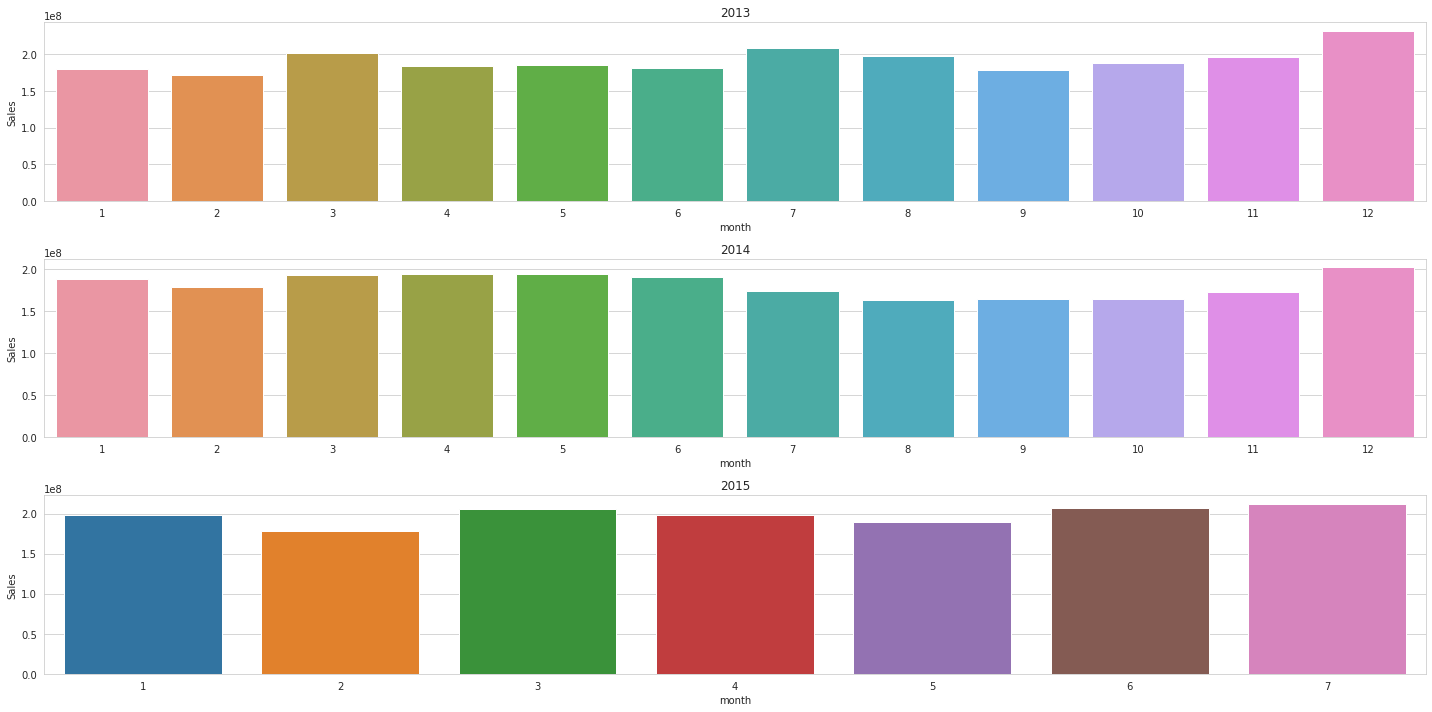

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes[0].set_title('2013')
sns.barplot(ax=axes[0], data=temp1, x='month', y='Sales')
axes[1].set_title('2014')
sns.barplot(ax=axes[1], data=temp2,x='month', y='Sales')
axes[2].set_title('2015')
sns.barplot(ax=axes[2], data=temp3, x='month', y='Sales')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To know the sales of the store for specific year and its respective months.

#####  What is/are the insight(s) found from the chart?

1. For year 2013 sales was highest in december and least in february.
2. For year 2014 sales was highest in december and least in august.
3. For year 2015 sales was highest in july and there were no sales for the month august,september,october,november and december.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help in knowing which year and its month gained most sales and least sales.If a company wants to find out the months which are consistent in getting sales in all the 3 years this graph will provide insights.

#### Chart - 3- Month Vs Sales

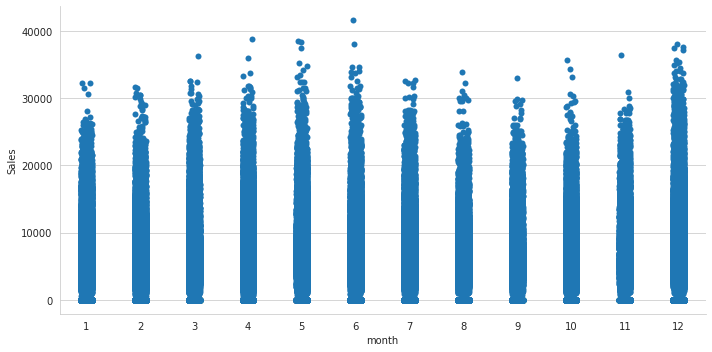

In [52]:
# Chart - 3 visualization code
sns.catplot(x="month" ,y = "Sales" , data=df1, aspect=2,size=6)

##### 1. Why did you pick the specific chart?

Sales of every month is depicted here.

##### What is/are the insight(s) found from the chart?

Sales in winter i.e November and December is climbs up.It might be due to the vacation period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales in the Month January,May,October decreases significantly.

#### Chart - 4- Yearly sales

   year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


<Axes: xlabel='year', ylabel='Sales'>

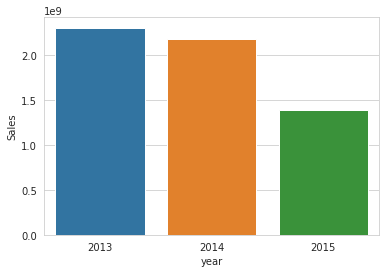

In [53]:
# Chart - 4 visualization code
#Yearwise
result=df1.groupby(['year'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'year', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

To know overall which year had the most sales.

##### What is/are the insight(s) found from the chart?

2013 has the highest sales followed by 2014 and then 2015.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,It'll help to find out the different conditions which helped in the Sales for 2013.

#### Chart - 5- Monthly Sales

    month      Sales
0       1  566728724
1       2  528734410
2       3  599831906
3       4  575895295
4       5  569248217
5       6  578112775
6       7  595059205
7       8  361791202
8       9  342570131
9      10  351878728
10     11  369498877
11     12  433831153


<Axes: xlabel='month', ylabel='Sales'>

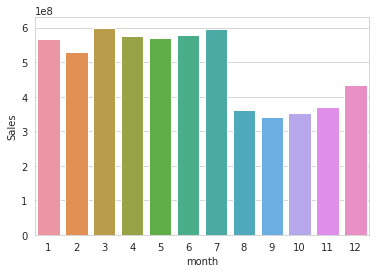

In [54]:
# Chart - 5 visualization code
#MonthWise
result = df1.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'month', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

To know sum of sales of each particular month.

##### 2. What is/are the insight(s) found from the chart?

Sum of sales of March is highest followed by July.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide the month where sum of sales is more and the factors which are affecting the sales like holidays.

#### Chart - 6- School Holiday

In [55]:
dff.SchoolHoliday.value_counts()
#As we can see 0 has more counts.So, it'll mean 0 implies school is open and 1 implies school is closed.

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

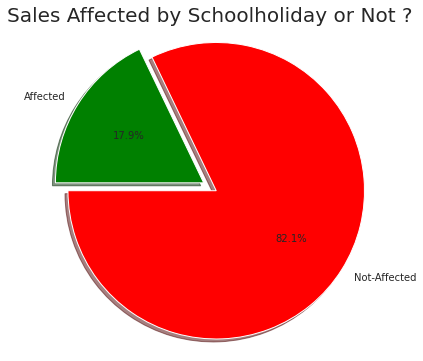

In [56]:
# Chart - 6 visualization code
labels = 'Not-Affected' , 'Affected'
sizes = dff.SchoolHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

To know whether the sales is affected by SchoolHoliday or not.

##### 2. What is/are the insight(s) found from the chart?

Around 18% of the Sales if affected by SchoolHoldiay rest 82% remain unaffected.So Majorly SchoolHoliday is not affected the Sales much.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Deciding whether opening a store on School holiday will be beneficial or not.Suppose a company wants to launch some products which is targeted towards students,this graph will depict whether having school holiday will impact the sales of those products or not.

#### Chart - 7 State Holiday 

In [57]:
# Chart - 7 visualization code
dff.StateHoliday.value_counts()
#0->No holidays and a,b,c->Different types holidays

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [58]:
dff["StateHoliday"] = dff["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
dff.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

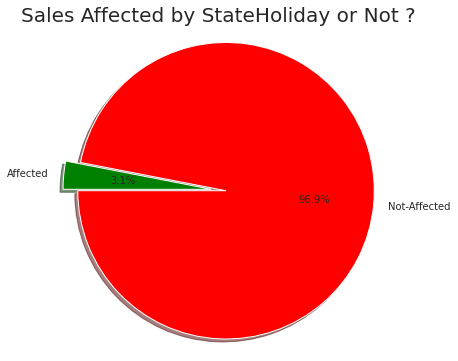

In [59]:
labels = 'Not-Affected' , 'Affected'
sizes = dff.StateHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by StateHoliday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

To know the affect of State holiday on the Sales.

##### 2. What is/are the insight(s) found from the chart?

i. Only 3% Sales is affected by State Holiday.

ii. Remaining 97% Sales are unaffected.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Suppose some company is launching its new collections of products and wants to find out whether launching it during state holidays will be beneficial or not.This graph will provide an idea regarding the affect of state holiday on sales.

#### Chart - 8 - Promo

In [60]:
dff.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

Text(0.5, 0, 'Promo')

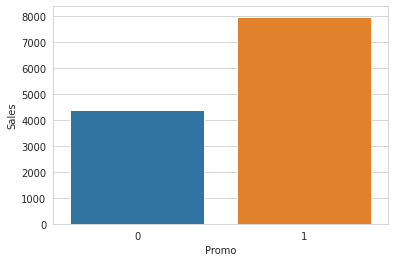

In [61]:
# Chart - 8 visualization code
promo=dff.groupby(['Promo'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo.index, y = promo['Sales'])
plt.xlabel('Promo')
#0->No Promotion, 1-Promotion

In [62]:
dff.Promo2.value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

Text(0.5, 0, 'Promo2')

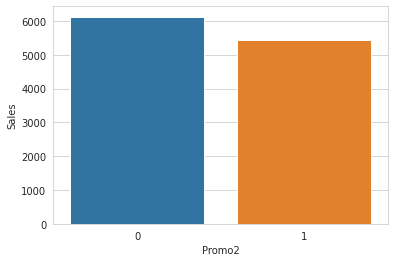

In [63]:
promo2=dff.groupby(['Promo2'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo2.index, y = promo2['Sales'])
plt.xlabel('Promo2')
#0->No Promotion, 1-Promotion

##### 1. Why did you pick the specific chart?

To know the affect of Promotion on Sales.

##### 2. What is/are the insight(s) found from the chart?

1. In the 1st graph promotion(Promo) showed growth in sales.
2. In the 2nd graph promotion(Promo2) showed no growth.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will be helpful while deciding whether promotion will impact the sales and if so how much promotion will be beneficial.

#### chart 9 - Types of stores

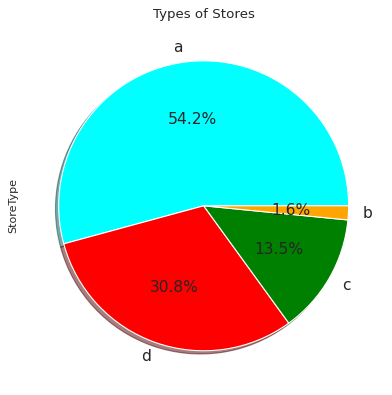

In [64]:
# Chart - 9 visualization code Promo
plt.figure(figsize=(10,7), dpi=80)

dff['StoreType'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['cyan','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Stores")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

To know the different types of stores and their respective Sales.

##### 2. What is/are the insight(s) found from the chart?

Store type a has the most sales followed by d then c and at last b.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll identify the store type and in what percentage they are present.This will be helpful in knowing which type of store is generating more sales and later its percentage can be increased.Similarly this will show which type of store is generating less sales and if that type is present in high percentage then it can be changed with other type of store that is generating better revenue.

#### Chart - 10 - Different Sales chart

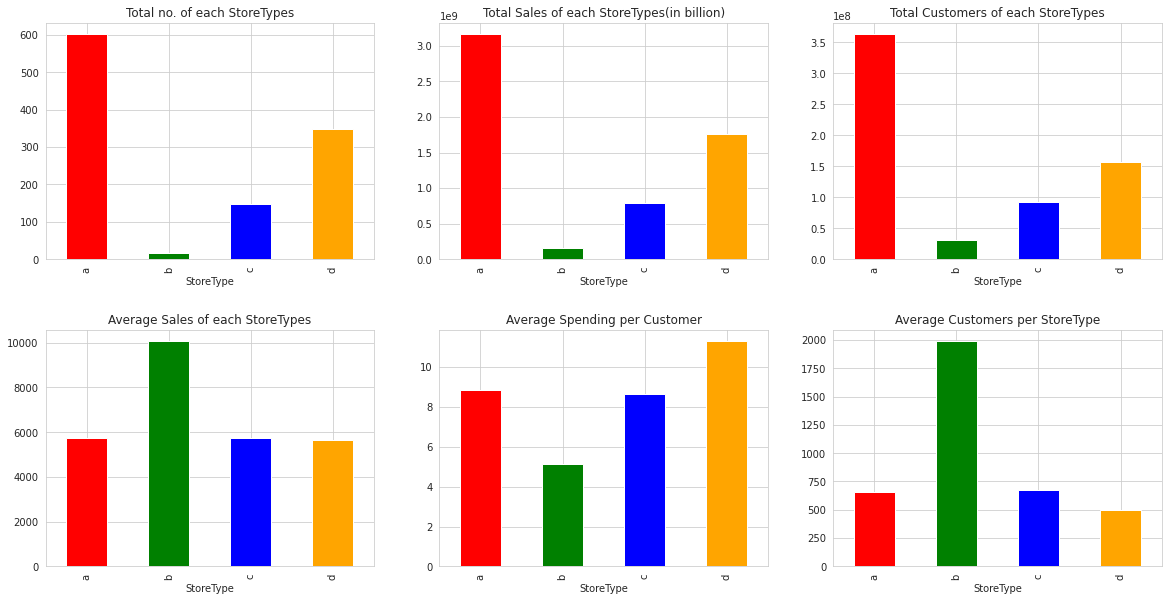

In [66]:
# Chart - 10 visualization code
dff["Avg_Customer_Sales"] = rossmann_df.Sales/rossmann_df.Customers
f, ax = plt.subplots(2, 3, figsize = (20,10))

color=[ 'red', 'green', 'blue', 'orange']

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total no. of each StoreTypes",color=color)
dff.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of each StoreTypes(in billion)",color=color)
dff.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total Customers of each StoreTypes",color=color)
dff.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of each StoreTypes",color=color)
dff.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer",color=color)
dff.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color=color)

plt.subplots_adjust(hspace = 0.3)
plt.show()

In [67]:
dff.drop('Avg_Customer_Sales',axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

The know the customer spending analysis in each store type.

##### 2. What is/are the insight(s) found from the chart?

1. 1st graph represents the total no. of each type of store.
2. 2nd graph represents the total sales in each type of store.
3. 3rd grapg represents the total customers visiting each type of store.
4. 4th graph represents averaga sales of each type of store.
5. 5th graph represents the average spending by each customer in each type of store.
6. 6th graph represents the average customer visiting each type of store.

#### Chart -11 - Assortment

<Axes: xlabel='Assortment', ylabel='Sales'>

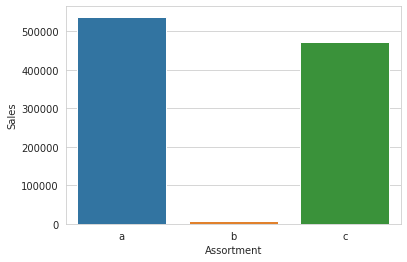

In [68]:
# Chart - 11 visualization code
t=dff.groupby('Assortment',as_index=False).agg({'Sales':'count'})
#sns.countplot(x='Sales',hue="Assortment",data=t)
sns.barplot(x='Assortment',y='Sales',data=t)

<Axes: xlabel='StoreType', ylabel='Sales'>

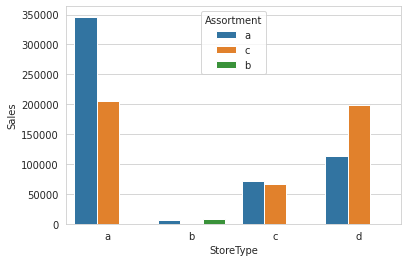

In [69]:
temp=dff.groupby(['StoreType','Assortment'],as_index=False).agg({'Sales':'count'})
sns.barplot(x='StoreType',y='Sales',hue='Assortment',data=temp)

##### 1. Why did you pick the specific chart?

To know which type of Assortment is sold more.

##### What is/are the insight(s) found from the chart?

1. Store type a has a and c type assortment.
2. Store type b has a and b type assortment.
3. Store type c has a and c type assortment.
4. Store type d has a and c type assortment.
5. Assortment type a is sold more which means their demand is high followed by type c.
6. b has the least sales which might mean they are high quality product and also they are available only in store type b. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide details about which type of assortment is highly sold in which type of store.If any particular type of Assortment is not generating enough revenue then it can be changed with some other Assorment.


#### Chart -12 Customer vs Sales

<ipython-input-70-ecd5af3d1517>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax= sns.scatterplot(data=dff, x="Customers", y="Sales", palette ='bright').set_title("Sales vs Customers")


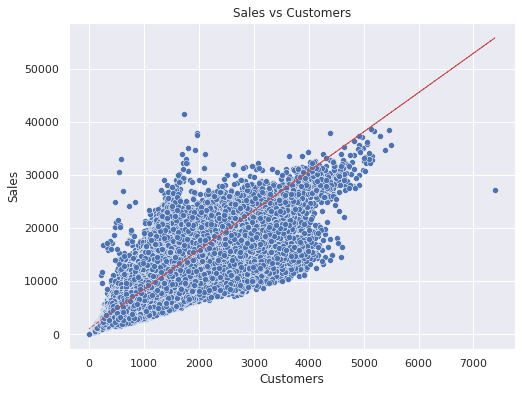

In [70]:
# Chart - 12 visualization code
sns.set(rc={"figure.figsize": (8, 6)})
ax= sns.scatterplot(data=dff, x="Customers", y="Sales", palette ='bright').set_title("Sales vs Customers")
z = np.polyfit(dff['Customers'], dff['Sales'], 1)
y = np.poly1d(z)(dff['Customers'])
plt.plot(dff['Customers'], y, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

This graph depicts each customer and its respective sales.The red line represents mean sales and customer.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of customers lie beneth the red line.
2. Customers between the range [0-5000] are responsible for Sales between the range [0-35000]. 
3. Some outliers can also be seen.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide the details regarding the customers and the amount of Sales they are responsible for.This will show the details of how many customers are responsible for how much sales.In the graph it can be clearly seen that more customers are present under the red line.

#### Chart - 13 Promotion 

<Axes: xlabel='Promotion', ylabel='count'>

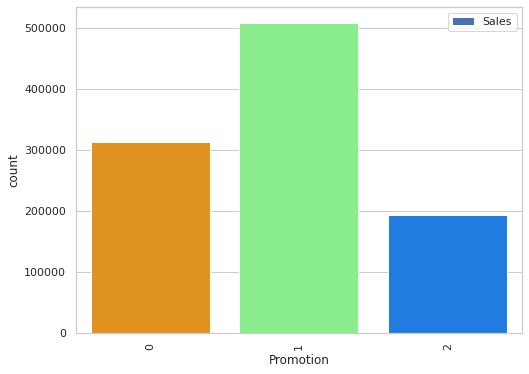

In [71]:
# Chart - 13 visualization code
sns.set_style("whitegrid")
dff['Promotion']=dff['Promo']+dff['Promo2']
dff.groupby(['Promotion']).agg({'Sales':'count'}).plot.bar()
sns.countplot(x="Promotion", data=dff,palette='jet_r')

In [72]:
dff.drop(['Promo','Promo2'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

To know the affect of promotion on Sales.

##### 2. What is/are the insight(s) found from the chart?

Store which are promoted once have the highest sales followed by the stores with 0 promotion and stores which are promoted twice doesn't have a huge impact on sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the graph the store promoted more than once have the least sales compared to others.

#### Chart - 14 - Correlation Heatmap

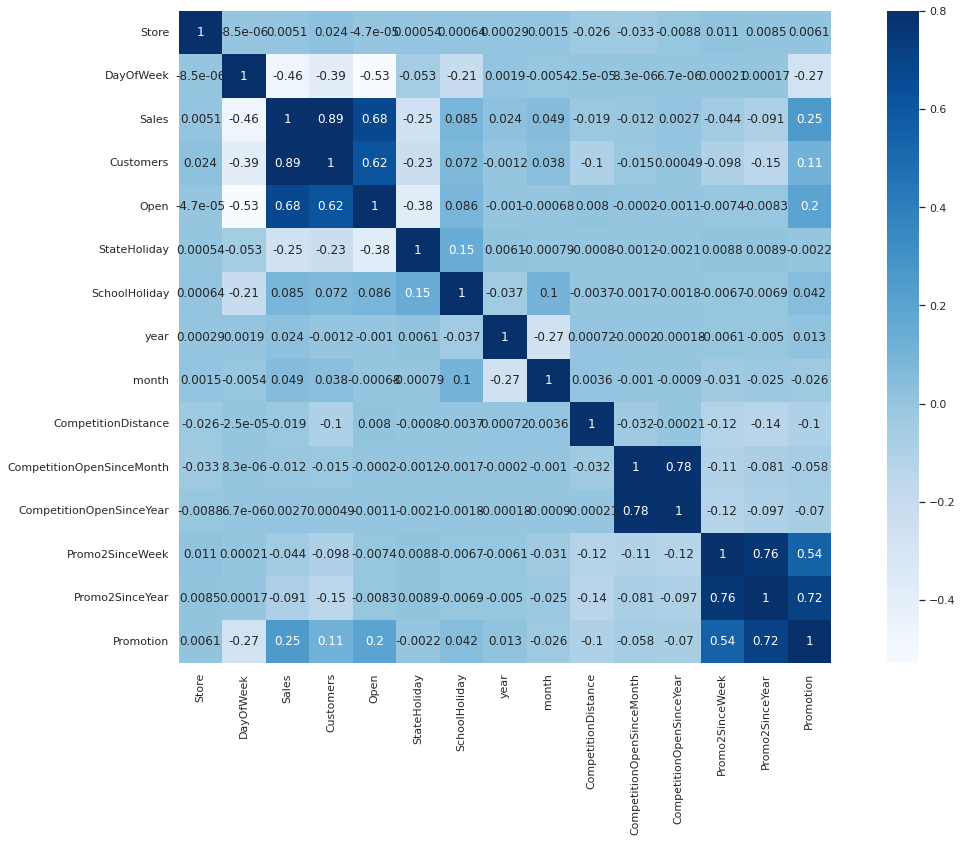

In [73]:
# Correlation Heatmap visualization code
#correlation matrix
corrmat = dff.corr()
h, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True , cmap="Blues",annot=True);

##### 1. Why did you pick the specific chart?

To know how each feature is related to every other feature.

##### 2. What is/are the insight(s) found from the chart?

Considering sales as our main priority, the following are the insights:
1. Store and Sales are almost negligible correlated.
2. DayofWeek and Sales  are negatively(-0.45) correlated.
3. Customer and Sales are positively(0.89) correlated.
4. Open and Sales are positively(0.68) correlated.
5. Promotion and Sales are positively(0.25) correlated.
6. All the other features are negligibly correlated with Sales.

#### Chart - 15 - Pair Plot 

In [74]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
new_df=dff[['DayOfWeek','Sales','Customers','StoreType']].copy()

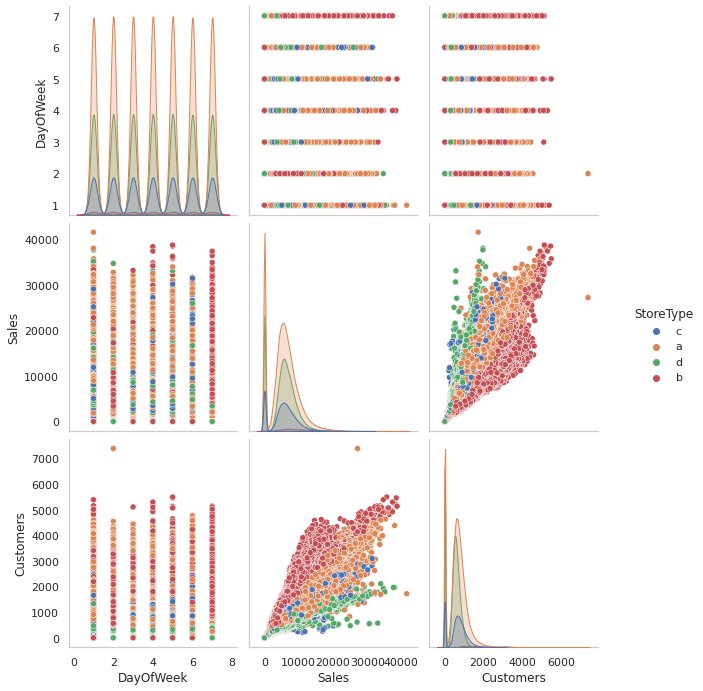

In [75]:
pp=sns.pairplot(new_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

To plot multiple pairwise bivariate distributions of a dataset.

##### 2. What is/are the insight(s) found from the chart?

1. On 7th day of the week StoreType b had the most customer and sales.
2. Overall sales of StoreType b is the highest.
3. StoreType c and d are less in number compared to StoreType a and b.

In [1]:
#Mapping
dff["Assortment"] = dff["Assortment"].map({"a": 0, "b": 1, "c": 2})
dff["StoreType"] = dff["StoreType"].map({"a": 0, "b": 1, "c": 2,"d":3})

NameError: ignored

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***